# **Data Loading and Initial Exploration**

In [2]:
# Importing the necessary Python libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
# Load data
dataset = pd.read_csv("behavior_logs.csv")

In [4]:

print(f"Dataset Shape: {dataset.shape}")

Dataset Shape: (5000, 10)


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   employee_id               5000 non-null   int64  
 1   meetings_attended         5000 non-null   int64  
 2   collaboration_score       5000 non-null   int64  
 3   punctuality_score         5000 non-null   int64  
 4   training_hours_completed  5000 non-null   float64
 5   work_engagement_score     5000 non-null   int64  
 6   peer_interaction_score    5000 non-null   int64  
 7   initiative_score          5000 non-null   int64  
 8   task_followup_score       5000 non-null   int64  
 9   performance_rating        5000 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 390.8+ KB


In [6]:
# Displaying data types of dataset
print("\n Data Types:")
print(dataset.dtypes)


 Data Types:
employee_id                   int64
meetings_attended             int64
collaboration_score           int64
punctuality_score             int64
training_hours_completed    float64
work_engagement_score         int64
peer_interaction_score        int64
initiative_score              int64
task_followup_score           int64
performance_rating           object
dtype: object


In [7]:
# Descriptive statistics of dataset(Behaviour_logs)
dataset.describe()

,employee_id,meetings_attended,collaboration_score,punctuality_score,training_hours_completed,work_engagement_score,peer_interaction_score,initiative_score,task_followup_score
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3500.500000,11.962000,6.98020,7.497200,12.428960,6.985800,6.983600,4.959800,6.961600
std,1443.520003,4.338378,1.40947,1.121715,4.333469,1.403137,1.416945,2.577734,1.418213
min,1001.000000,5.000000,5.00000,6.000000,5.000000,5.000000,5.000000,1.000000,5.000000
25%,2250.750000,8.000000,6.00000,6.000000,8.600000,6.000000,6.000000,3.000000,6.000000
50%,3500.500000,12.000000,7.00000,8.000000,12.400000,7.000000,7.000000,5.000000,7.000000
75%,4750.250000,16.000000,8.00000,8.000000,16.200000,8.000000,8.000000,7.000000,8.000000
max,6000.000000,19.000000,9.00000,9.000000,20.000000,9.000000,9.000000,9.000000,9.000000


In [8]:
#Checking for missing values
dataset.isnull().sum()

,0
employee_id,0
meetings_attended,0
collaboration_score,0
punctuality_score,0
training_hours_completed,0
work_engagement_score,0
peer_interaction_score,0
initiative_score,0
task_followup_score,0
performance_rating,0


In [9]:
#Checking duplicated data
dataset.duplicated().sum()

np.int64(0)

In [10]:
#Employee_id verification
missing_values = f"Missing values in 'employee_id': {dataset['employee_id'].isnull().sum()}"
print(missing_values)
number_of_rows = f"Number of rows in the 'employee_id: {dataset['employee_id'].count()}"
print(number_of_rows)
distinct_values = f"Distinct values in 'employee_id': {dataset['employee_id'].nunique()}"
print(distinct_values)

Missing values in 'employee_id': 0
Number of rows in the 'employee_id: 5000
Distinct values in 'employee_id': 5000


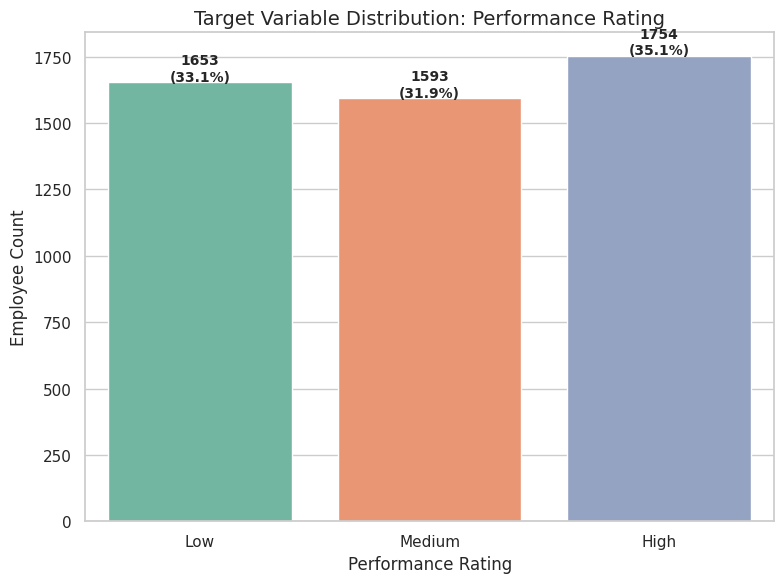

In [11]:

# Configure Plotting Aesthetics
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

# Logical ordering for ordinal categorical data
class_order = ['Low', 'Medium', 'High']

# Generate Count Plot
# Rationale: Countplot provides a direct visual comparison of class frequencies.
ax = sns.countplot(x='performance_rating', data=dataset, order=class_order, palette='Set2', hue='performance_rating', legend=False)

# Adding Titles and Labels
plt.title('Target Variable Distribution: Performance Rating', fontsize=14)
plt.xlabel('Performance Rating', fontsize=12)
plt.ylabel('Employee Count', fontsize=12)

# Annotation Rationale:
# Displaying both raw counts and percentages on the plot helps quickly identify
# potential class imbalance issues without needing a separate table.
for i, p in enumerate(ax.patches):
    count = dataset['performance_rating'].value_counts()[class_order[i]]
    pct = (count / len(dataset)) * 100
    ax.annotate(f'{count}\n({pct:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('performance_rating_distribution.png')

In [12]:
counts = dataset["performance_rating"].value_counts()
counts

,count
performance_rating,
High,1754
Low,1653
Medium,1593


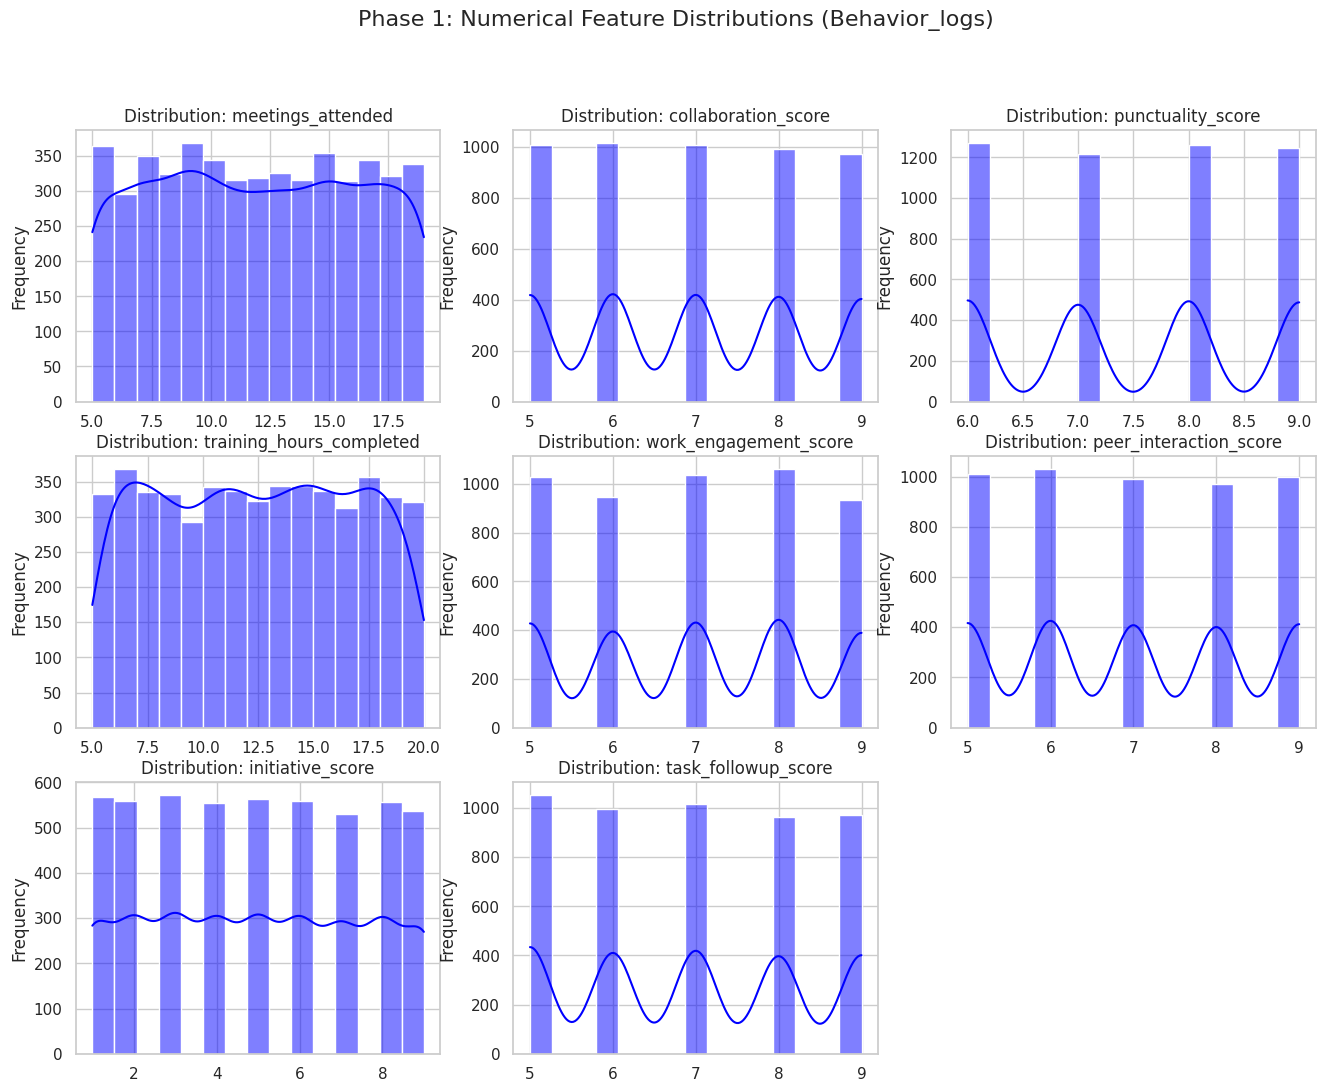

In [13]:
numerical_features = ['meetings_attended', 'collaboration_score', 'punctuality_score', 'training_hours_completed',
          'work_engagement_score', 'peer_interaction_score', 'initiative_score', 'task_followup_score']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(dataset[col], kde=True, color='blue', bins=15)
    plt.title(f'Distribution: {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.suptitle('Phase 1: Numerical Feature Distributions (Behavior_logs)', fontsize=16)
plt.savefig('behavioural_logs_histograms.png')

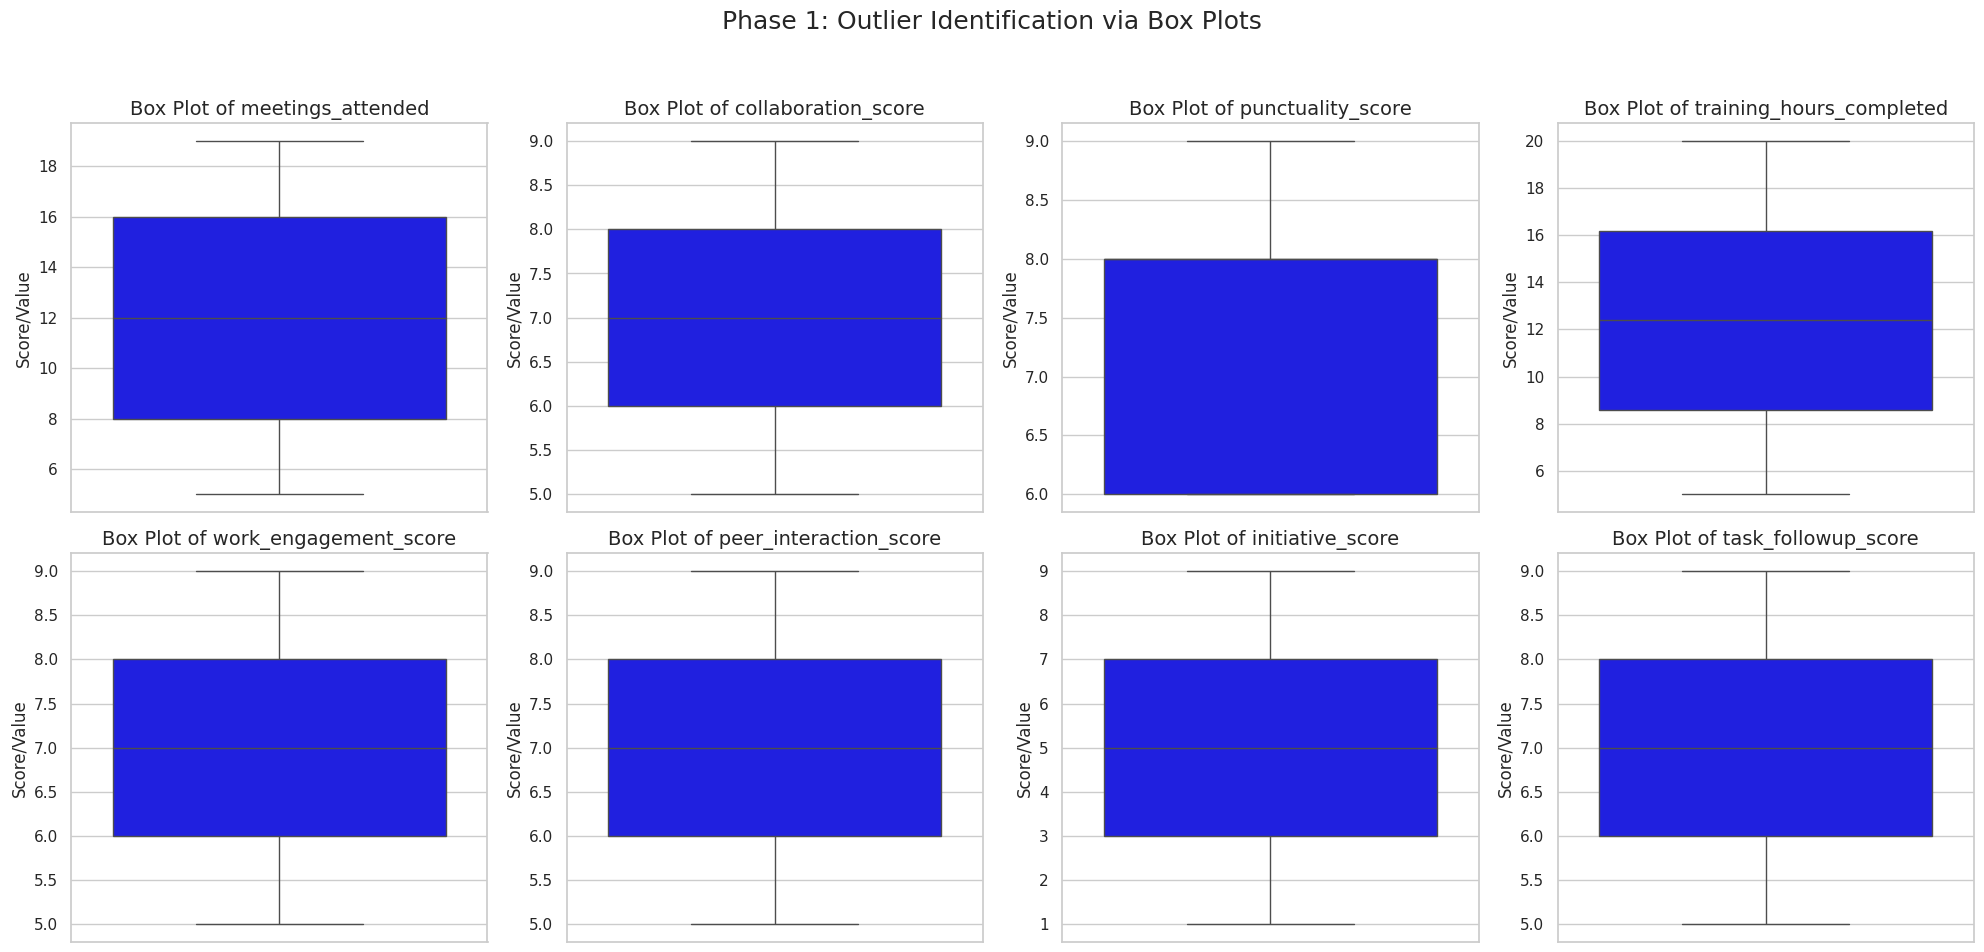

In [14]:
numerical_features = ['meetings_attended', 'collaboration_score', 'punctuality_score', 'training_hours_completed',
          'work_engagement_score', 'peer_interaction_score', 'initiative_score', 'task_followup_score']
# 3. Visualization Setup
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    # Rationale: flierprops highlights outliers with a red 'x' for better visibility.
    sns.boxplot(y=dataset[col], color='blue',
                flierprops={"marker": "x", "markersize": 10, "markerfacecolor": "red"})
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.ylabel('Score/Value')

plt.suptitle('Phase 1: Outlier Identification via Box Plots', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('structured_data_boxplots.png')

In [15]:
#Outlier detection
for col in numerical_features:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers found")

meetings_attended: 0 outliers found
collaboration_score: 0 outliers found
punctuality_score: 0 outliers found
training_hours_completed: 0 outliers found
work_engagement_score: 0 outliers found
peer_interaction_score: 0 outliers found
initiative_score: 0 outliers found
task_followup_score: 0 outliers found


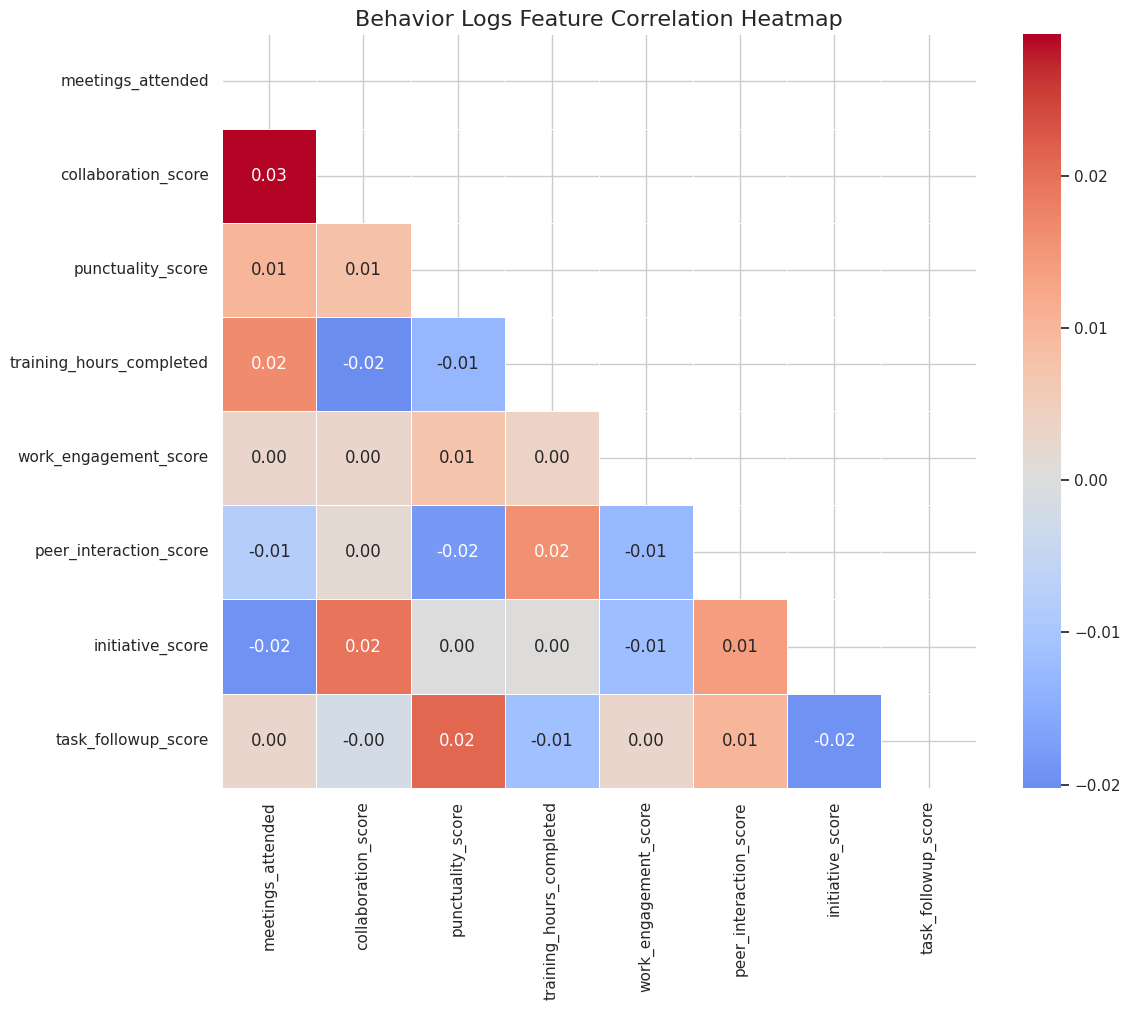

In [16]:
# Building correlation heatmap
features = dataset.drop(columns=['employee_id', 'performance_rating'])

# Calculate Pearson Correlation
corr_matrix = features.corr()

# Visualization Setup
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate Heatmap
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f")

plt.title('Behavior Logs Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.savefig('feature_correlation_heatmap.png')

**Observations**

   - The dataset is clean: **0 missing values**, **0 duplicate rows**, and **5,000 unique employee_id** entries.  
   - Features are a mix of integers (`meetings_attended`) and floats (`training_hours_completed`), with scores mostly on a consistent 1–10 scale.  
   - The target variable `performance_rating` is **perfectly balanced** (~33.3% each for Low, Medium, High classes), which supports fair model training without resampling.

# **Data Preprocessing**

In [17]:
# Feature Engineering
dataset["engagement_per_training"] = (
    dataset["work_engagement_score"] /
    dataset["training_hours_completed"])

In [18]:
rating_map = {'Low': 0, 'Medium': 1, 'High': 2}

# Apply to your dataframe
dataset['performance_rating_encoded'] = dataset['performance_rating'].map(rating_map)

In [19]:
dataset.head()

,employee_id,meetings_attended,collaboration_score,punctuality_score,training_hours_completed,work_engagement_score,peer_interaction_score,initiative_score,task_followup_score,performance_rating,engagement_per_training,performance_rating_encoded
0,1001,10,9,6,17.8,7,6,1,6,Low,0.393258,0
1,1002,8,6,6,8.3,9,7,9,5,Low,1.084337,0
2,1003,15,7,9,6.4,8,9,8,6,Low,1.250000,0
3,1004,17,9,7,12.5,5,6,3,5,Medium,0.400000,1
4,1005,9,8,9,10.9,7,9,4,7,Low,0.642202,0


In [20]:
columns = dataset.columns.tolist()

# Find the index of 'quality_per_task' and 'performance_rating'
idx_quality_per_task = columns.index('engagement_per_training')
idx_performance_rating = columns.index('performance_rating')

# Swap the column names in the list
columns[idx_quality_per_task], columns[idx_performance_rating] = columns[idx_performance_rating], columns[idx_quality_per_task]

# Reindex the DataFrame with the new column order
dataset = dataset[columns]

In [21]:
dataset.head()

,employee_id,meetings_attended,collaboration_score,punctuality_score,training_hours_completed,work_engagement_score,peer_interaction_score,initiative_score,task_followup_score,engagement_per_training,performance_rating,performance_rating_encoded
0,1001,10,9,6,17.8,7,6,1,6,0.393258,Low,0
1,1002,8,6,6,8.3,9,7,9,5,1.084337,Low,0
2,1003,15,7,9,6.4,8,9,8,6,1.250000,Low,0
3,1004,17,9,7,12.5,5,6,3,5,0.400000,Medium,1
4,1005,9,8,9,10.9,7,9,4,7,0.642202,Low,0


**Reasons for Feature Engineering**
- Created `engagement_per_training` = `work_engagement_score / training_hours_completed`  
- This ratio captures **engagement return on training investment**.  
- High values indicate naturally motivated employees who maintain high engagement with little formal training.  
- Low values may signal disengagement despite training effort — potentially useful for HR intervention insights.

# **Train Test Split**

In [22]:
# Splitting the dataset according to the 80% and 20% rules

X = dataset.iloc[:,1:-2].values
y = dataset.iloc[:,-1].values

In [23]:
y

array([0, 0, 0, ..., 2, 1, 0])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [25]:
# Calculate the percentage distribution for each set
train_series = pd.Series(y_train)
test_series = pd.Series(y_test)
original_dist = dataset['performance_rating_encoded'].value_counts(normalize=True) * 100
train_dist = train_series.value_counts(normalize=True) * 100
test_dist = test_series.value_counts(normalize=True) * 100

print("--- Original Distribution ---")
print(original_dist)
print("\n--- Training Set Distribution ---")
print(train_dist)
print("\n--- Testing Set Distribution ---")
print(test_dist)

--- Original Distribution ---
performance_rating_encoded
2    35.08
0    33.06
1    31.86
Name: proportion, dtype: float64

--- Training Set Distribution ---
2    35.075
0    33.050
1    31.875
Name: proportion, dtype: float64

--- Testing Set Distribution ---
2    35.1
0    33.1
1    31.8
Name: proportion, dtype: float64


# **Model Building**



In [26]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
# Model Training

classifier = LogisticRegression(multi_class="auto", max_iter=1000, random_state=42)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto', random_state=42)

In [28]:
# Generate Predictions

train_pred = classifier.predict(X_train)
print(np.concatenate((train_pred.reshape(len(train_pred),1), y_train.reshape(len(y_train),1)),1))

[[2 1]
 [0 0]
 [0 0]
 ...
 [2 0]
 [2 2]
 [0 1]]


In [29]:
test_pred = classifier.predict(X_test)
print(np.concatenate((test_pred.reshape(len(test_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 2]
 [2 0]
 [2 2]
 ...
 [2 2]
 [0 0]
 [1 1]]


In [30]:
# View Confusion metrics

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_train, train_pred)
print(cm)
accuracy_score(y_train, train_pred)

[[499  49 774]
 [436  70 769]
 [442  61 900]]


0.36725

In [31]:
cm = confusion_matrix(y_test, test_pred)
print(cm)
accuracy_score(y_test, test_pred)

[[108  19 204]
 [104  13 201]
 [117  20 214]]


0.335

Training Accuracy: 36.73%
Test Accuracy:     33.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33       331
           1       0.25      0.04      0.07       318
           2       0.35      0.61      0.44       351

    accuracy                           0.34      1000
   macro avg       0.31      0.33      0.28      1000
weighted avg       0.31      0.34      0.29      1000



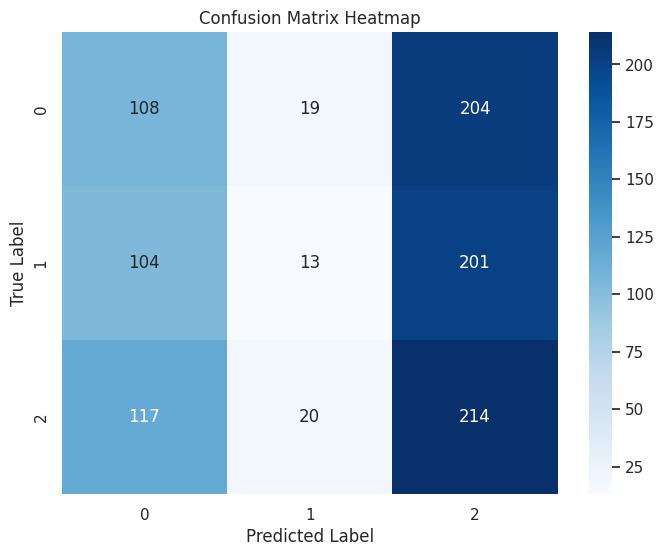

In [32]:
# 1. Accuracy
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
print(f"Training Accuracy: {train_acc:.2%}")
print(f"Test Accuracy:     {test_acc:.2%}")

# 2. Classification Report (Precision, Recall, F1 - Macro)
# This handles the per-class metrics automatically
print("\nClassification Report:")
print(classification_report(y_test, test_pred))

# 3. Confusion Matrix Heatmap
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [33]:
# Coefficient Interpretation

coef_df = pd.DataFrame(
    classifier.coef_,
    columns=dataset.columns[1:-2],
    index=classifier.classes_
)

print("Coefficients per Rating Class:")
print(coef_df)

Coefficients per Rating Class:
   meetings_attended  collaboration_score  punctuality_score  \
0           0.026086             0.028060          -0.012846   
1           0.019016             0.000127           0.015119   
2          -0.045102            -0.028188          -0.002273   

   training_hours_completed  work_engagement_score  peer_interaction_score  \
0                  0.042972              -0.087869               -0.011320   
1                 -0.045090               0.037177                0.013624   
2                  0.002118               0.050692               -0.002304   

   initiative_score  task_followup_score  engagement_per_training  
0         -0.019598            -0.025517                 0.051767  
1          0.016697            -0.015913                -0.043696  
2          0.002901             0.041430                -0.008071  


In [34]:
# 1. Define the filename for your audio model
filename = 'logistic_regression_model.pkl'

# 2. Save the trained model to a file
# 'wb' means writing in binary mode, which is required for pickle
pickle.dump(classifier, open(filename, 'wb'))

print(f"Model successfully saved as {filename}")

Model successfully saved as logistic_regression_model.pkl
